# Trabalho prático 1

Este trabalho foi feito por meio do ananconda na versão Windows e utilizando python 3.7. Foram utilizadas as bibliotecas pandas e scikit-learn instaladas através dos seguintes comandos:

conda install -c anaconda scikit-learn

conda install -c anaconda pandas 

In [117]:
import pandas as pd
import numpy as np
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.display import display

from sklearn import svm
from sklearn import metrics
from sklearn import ensemble
from sklearn import neighbors
from sklearn import feature_selection
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

print("Python version: ", sys.version)

Python version:  3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]


In [118]:
# Caminho do arquivo de entrada
INPUT_FILEPATH = "koi_data.csv"

# Variavel que queremos predizer
TARGET = "koi_disposition"

# Tamanho do conjunto de validacao (proporcao)
VAL_SIZE = 0.2

#Numero de features a serem usadas
#durante os testes de dimensão de features, os modelos performaram melhor utilizando todas a features da base de dados
N_FEATURES = 41

# Numero de folds
FOLDS = 5

In [119]:
# Leitura do dataset para um DataFrame do Pandas
df = pd.read_csv(INPUT_FILEPATH)

# Remove coluna do nome pois ela não será utilizada
df = df.drop(["kepoi_name"], axis=1)

# Imprime algumas informacoes basicas sobre os dados
print("Numero de linhas: {}".format(df.shape[0]))
print("Numero de colunas: {}".format(df.shape[1]))
print("Dados faltando: {}".format(df.isnull().sum().sum()))

print("\nAmostra:")
with pd.option_context("max_columns", 12): # Limita o numero de cols mostradas
    display(df.head(20))

# Cria uma lista com as features
features = list(df.columns)
features.remove(TARGET)

print("Target: {}".format(TARGET))
print("Features:")
print("\n".join(["  " + x for x in features]))

mpl.rc('font', size=14)

Numero de linhas: 5202
Numero de colunas: 42
Dados faltando: 0

Amostra:


,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,...,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,...,-0.010,0.200,0.200,0.080,0.310,0.320
1,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,...,0.390,0.000,0.390,0.490,0.120,0.500
2,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,...,-0.249,0.147,0.289,-0.257,0.099,0.276
3,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,...,0.030,-0.090,0.100,0.070,0.020,0.070
4,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,...,-4.506,7.710,8.930,-4.537,7.713,8.948
5,CONFIRMED,16.06865,0.052,3.53470,4914.3,0.06216,...,0.041,-0.015,0.044,0.005,0.030,0.031
6,CONFIRMED,2.47061,0.818,1.74319,14231.0,0.12387,...,-0.009,-0.300,0.300,0.015,-0.270,0.270
7,CONFIRMED,3.52250,0.631,3.19843,9145.7,0.09209,...,0.014,-0.013,0.020,-0.028,0.176,0.178
8,CONFIRMED,3.70921,0.051,2.63020,131.1,0.01042,...,0.240,-0.150,0.290,0.160,-0.130,0.210
9,FALSE POSITIVE,11.52145,2.483,3.63990,17984.0,1.62536,...,0.009,-0.009,0.013,0.147,0.037,0.151


Target: koi_disposition
Features:
  koi_period
  koi_impact
  koi_duration
  koi_depth
  koi_ror
  koi_srho
  koi_prad
  koi_sma
  koi_incl
  koi_teq
  koi_insol
  koi_dor
  koi_max_sngle_ev
  koi_max_mult_ev
  koi_model_snr
  koi_steff
  koi_slogg
  koi_smet
  koi_srad
  koi_smass
  koi_kepmag
  koi_gmag
  koi_rmag
  koi_imag
  koi_zmag
  koi_jmag
  koi_hmag
  koi_kmag
  koi_fwm_stat_sig
  koi_fwm_sra
  koi_fwm_sdec
  koi_fwm_srao
  koi_fwm_sdeco
  koi_fwm_prao
  koi_fwm_pdeco
  koi_dicco_mra
  koi_dicco_mdec
  koi_dicco_msky
  koi_dikco_mra
  koi_dikco_mdec
  koi_dikco_msky


In [120]:
#mostra os dados que estão faltando
df.isnull().sum().to_frame("Dados faltando").join(
    (df.isnull().sum().to_frame("%")*100/len(df)).round(2))

,Dados faltando,%
koi_disposition,0,0.0
koi_period,0,0.0
koi_impact,0,0.0
koi_duration,0,0.0
koi_depth,0,0.0
koi_ror,0,0.0
koi_srho,0,0.0
koi_prad,0,0.0
koi_sma,0,0.0
koi_incl,0,0.0


## Análise exploratória

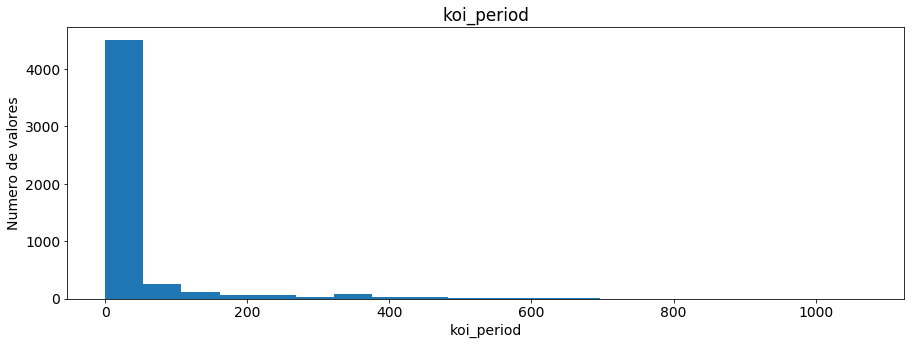

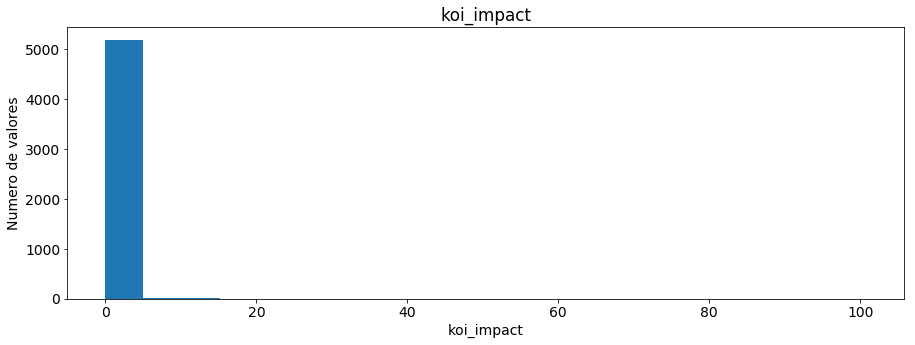

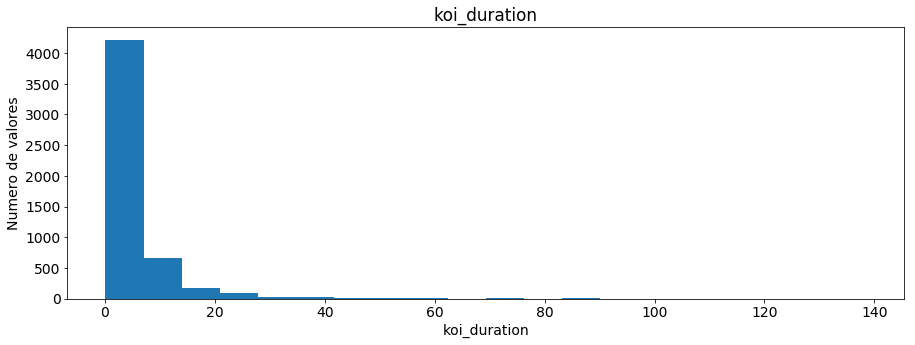

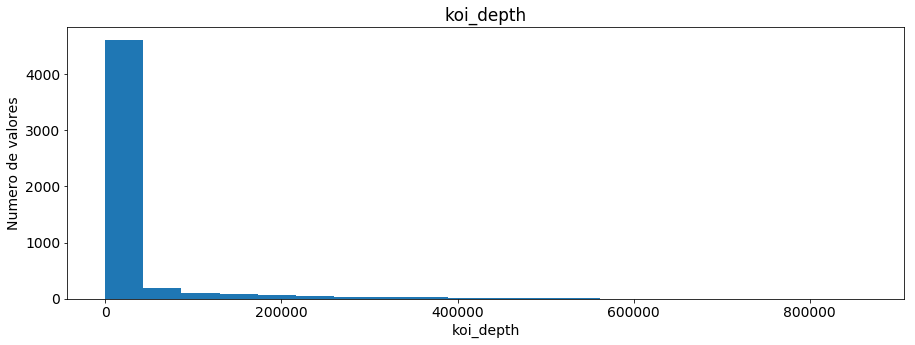

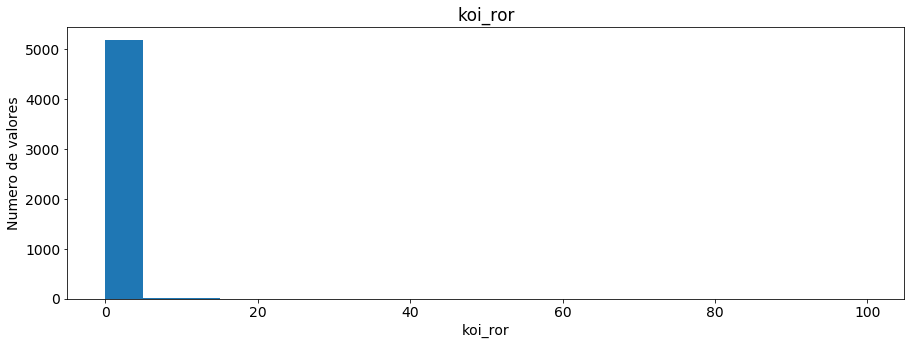

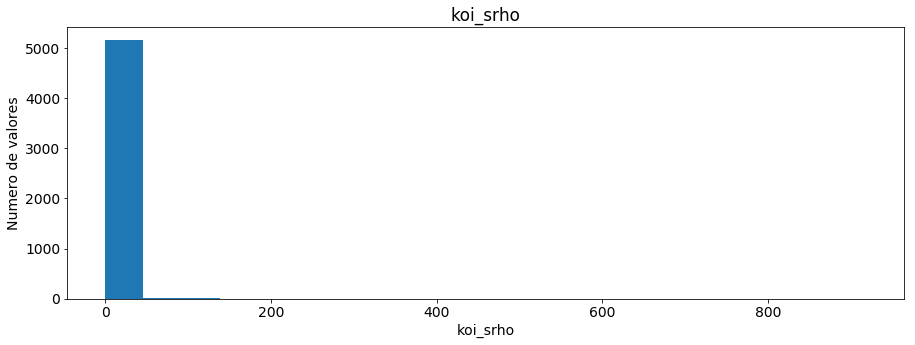

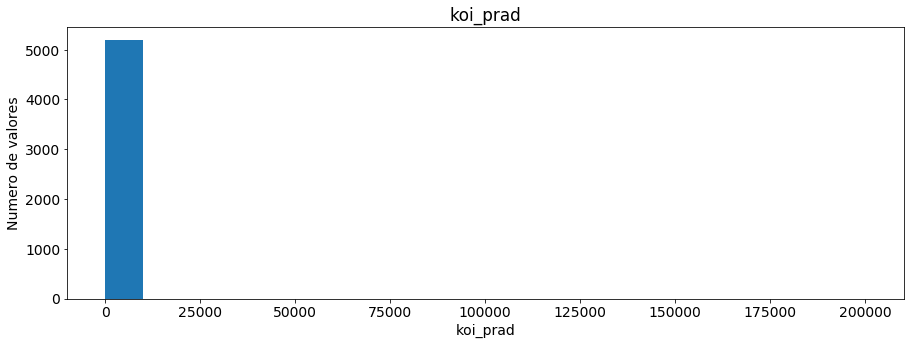

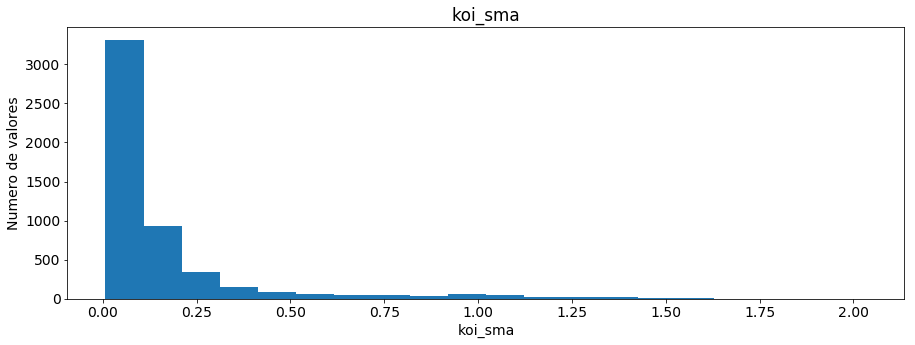

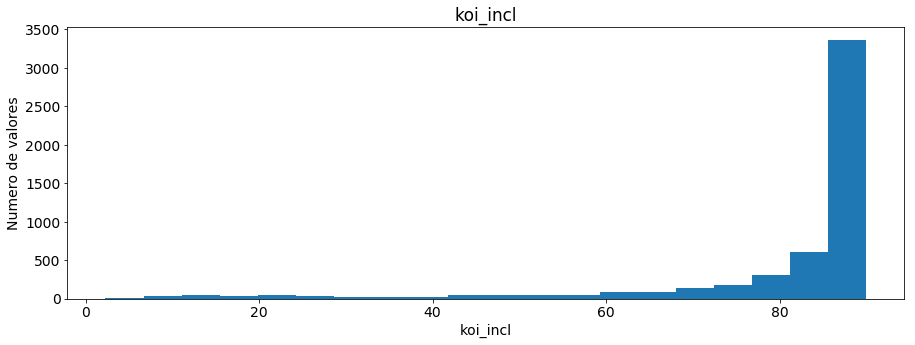

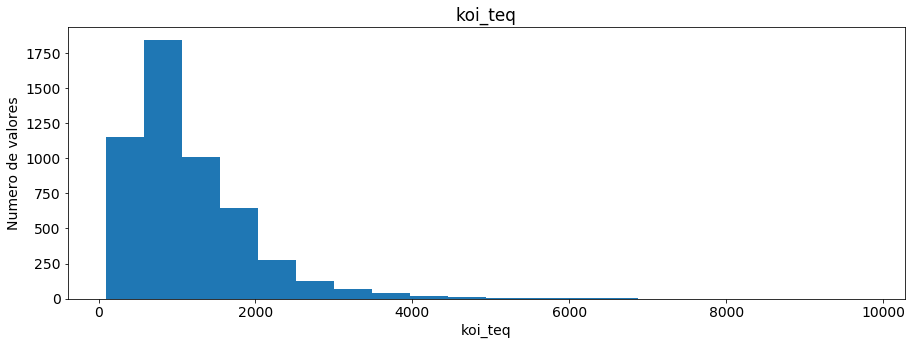

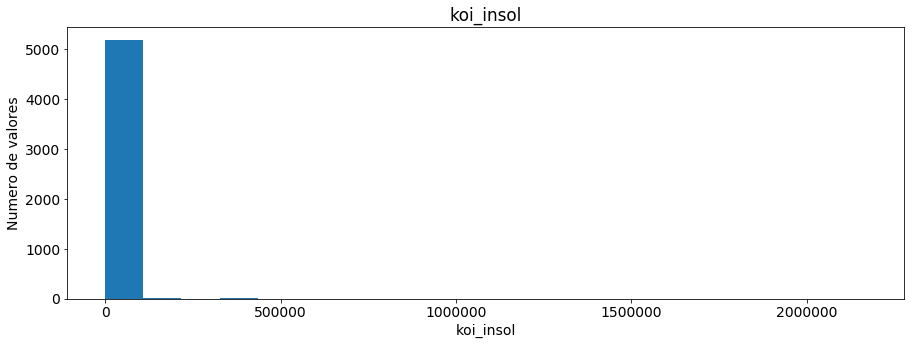

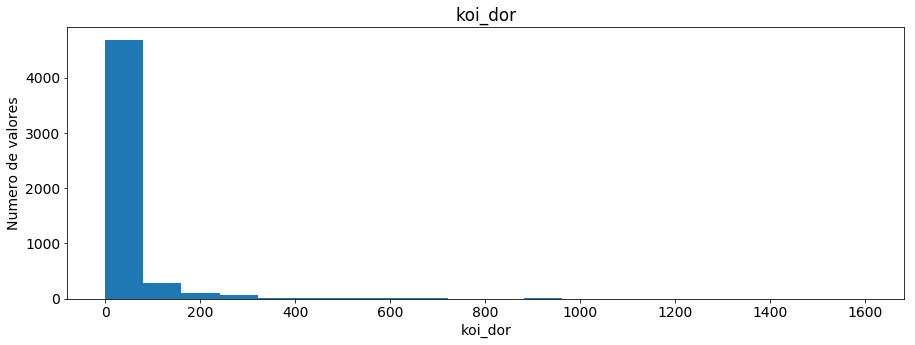

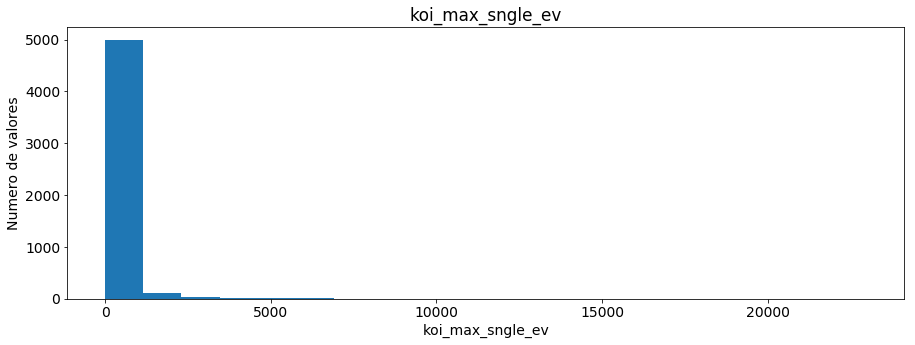

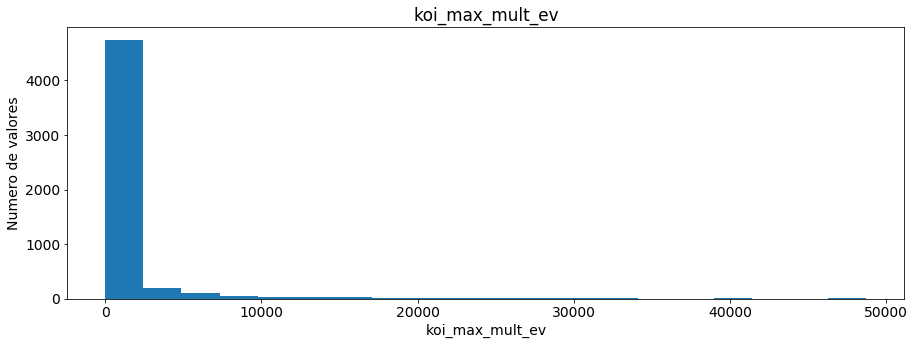

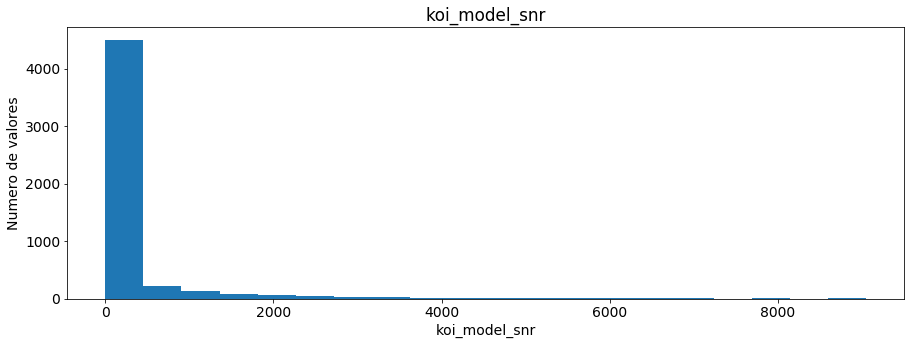

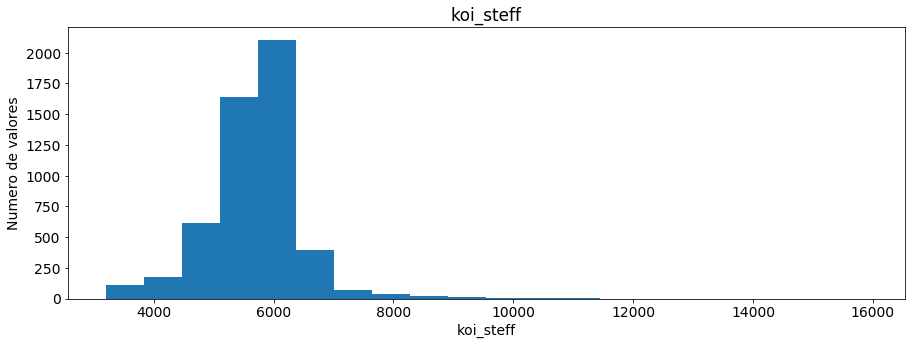

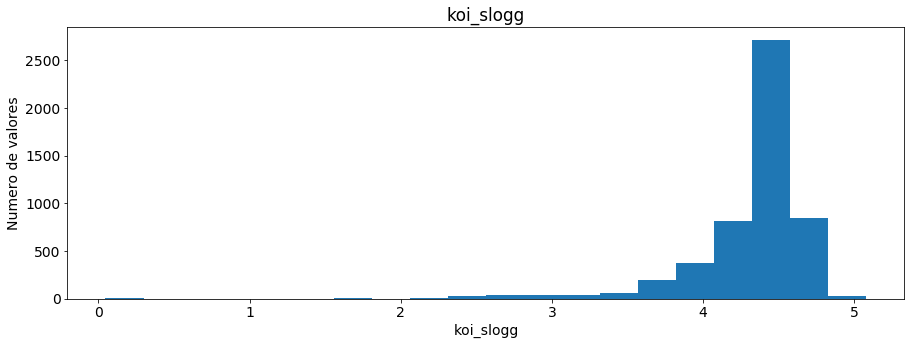

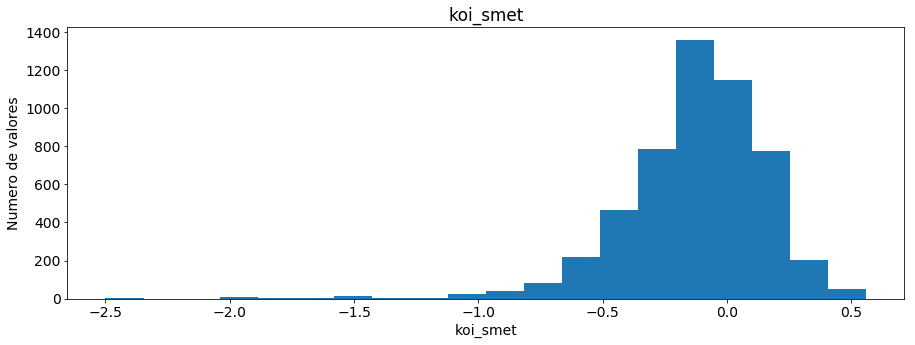

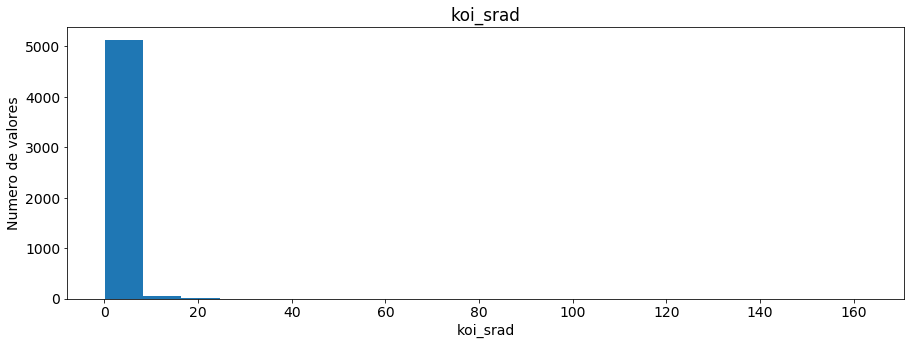

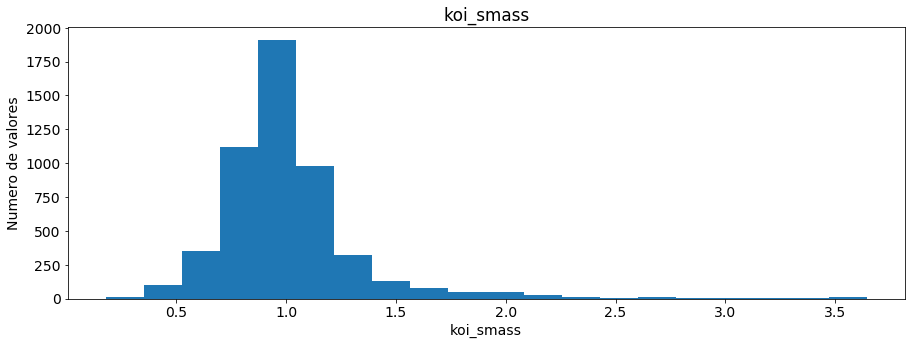

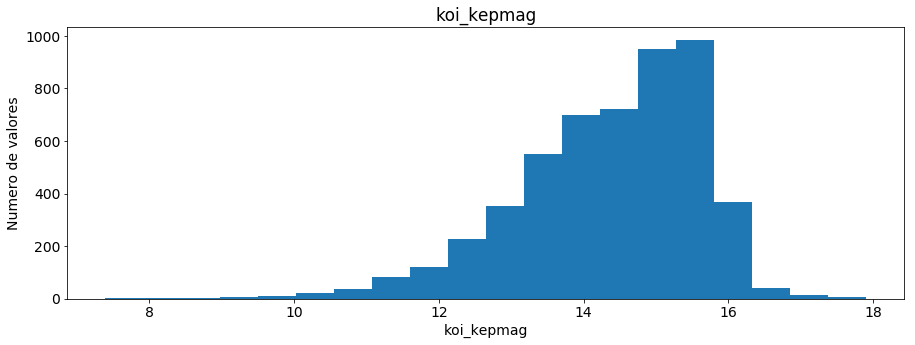

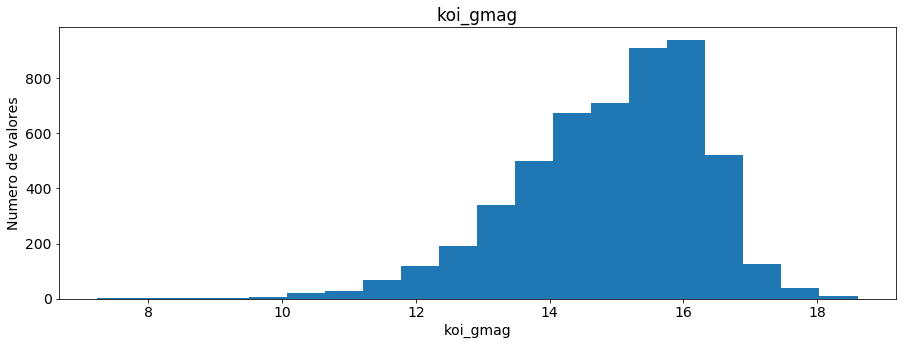

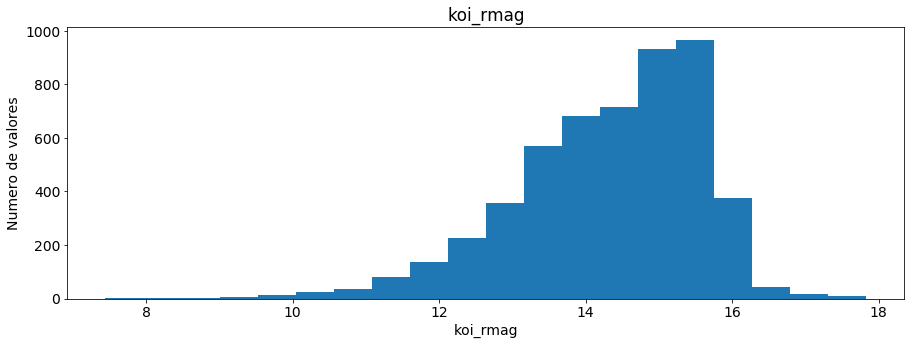

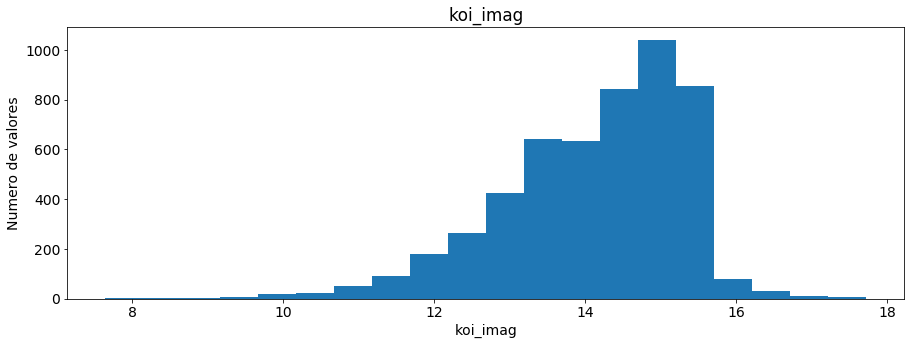

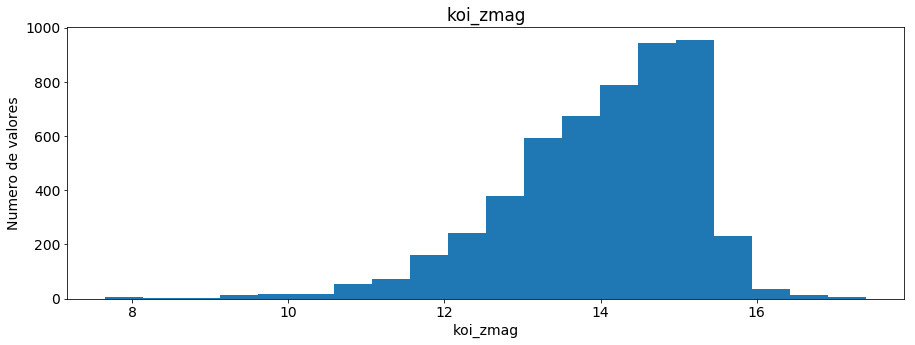

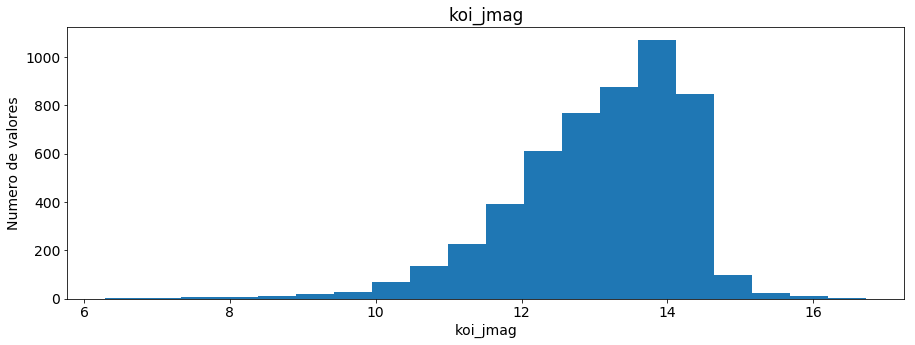

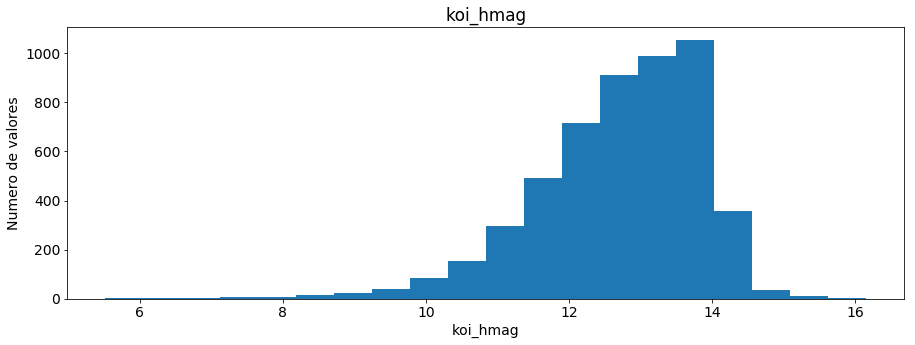

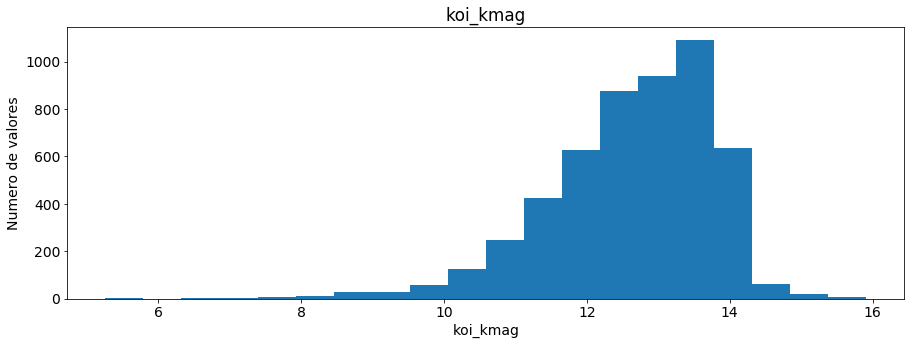

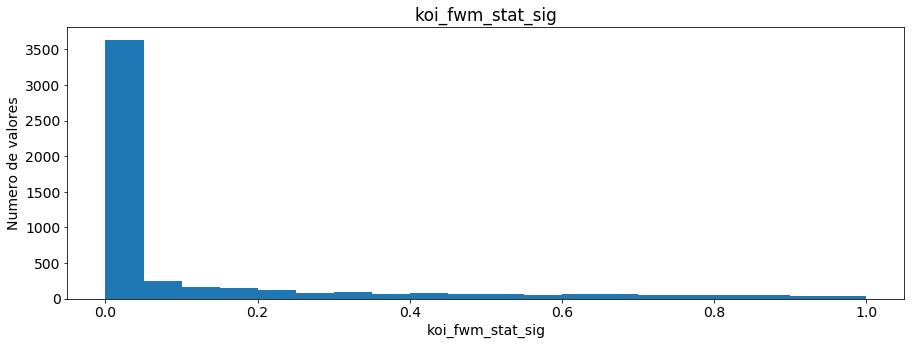

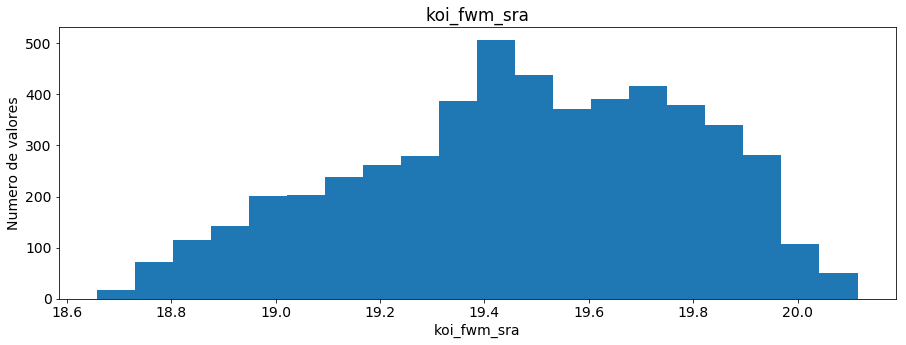

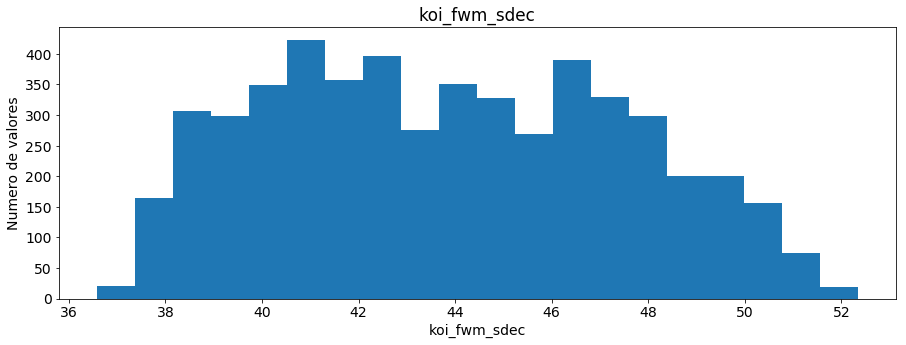

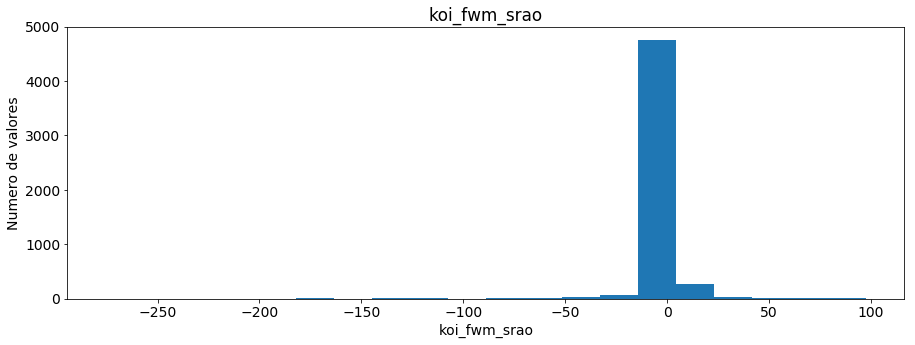

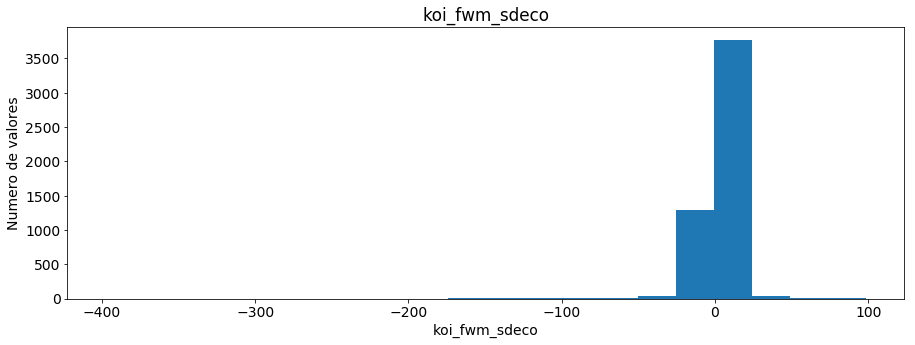

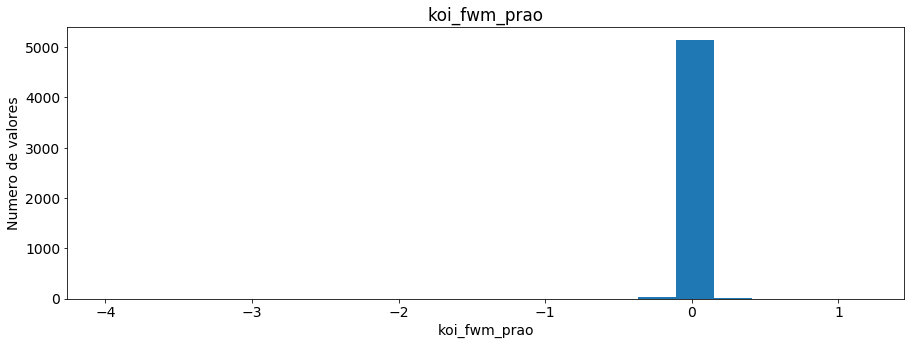

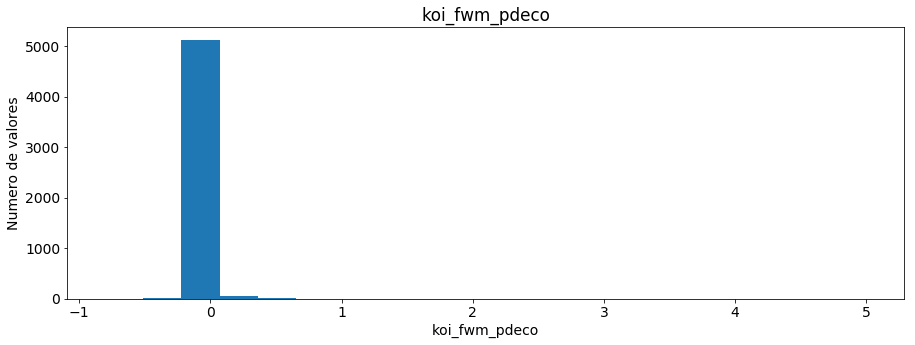

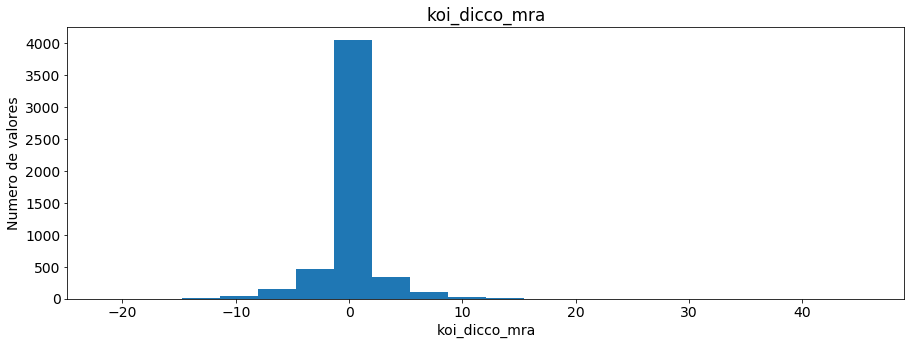

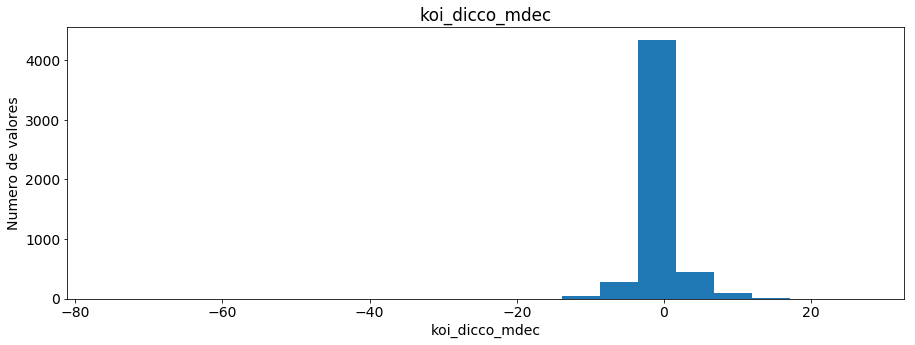

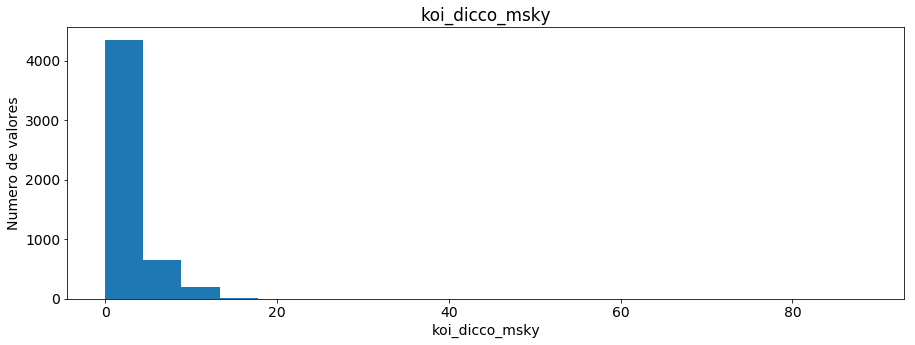

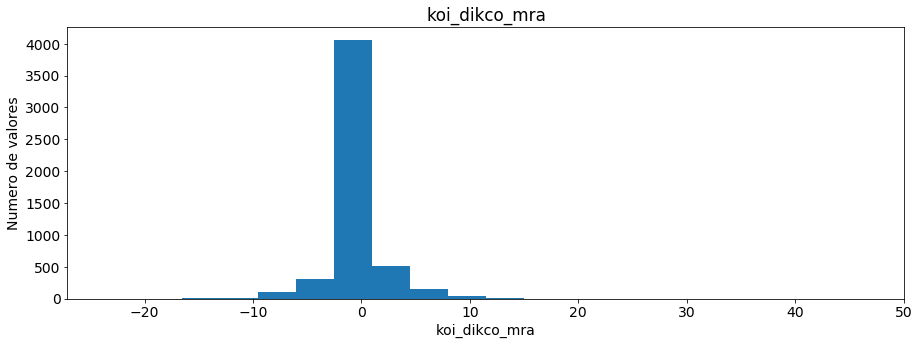

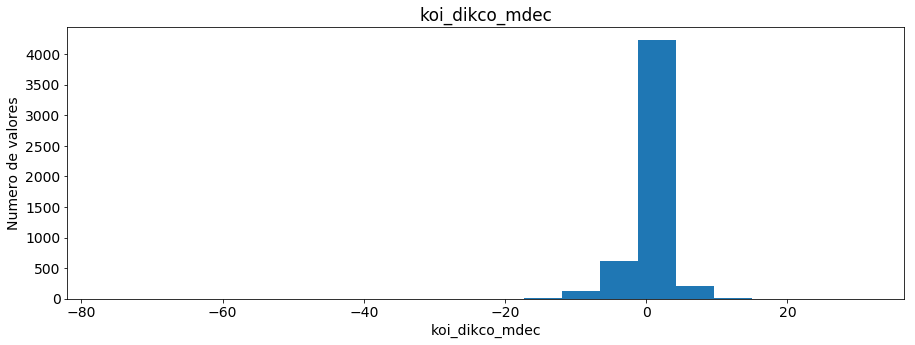

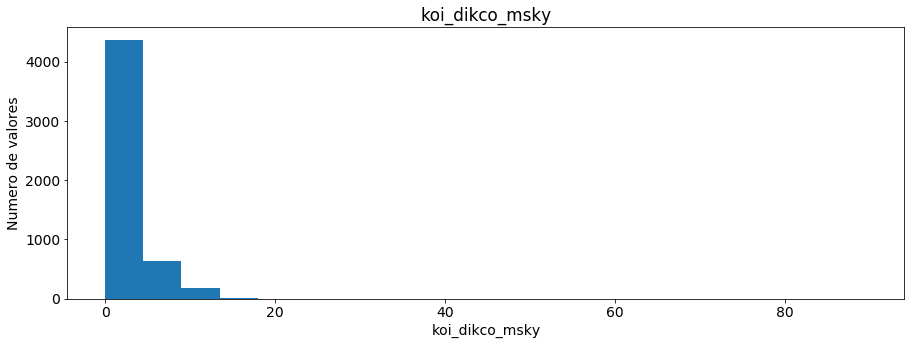

In [121]:
# Colunas com dados numericos (reais)
#OBS: a base de dados apresenta apenas dados numéricos com exceção do nome do objeto da variável que queremos predizer
real_cols = [ "koi_period", "koi_impact", "koi_duration", "koi_depth", "koi_ror", "koi_srho",
             "koi_prad", "koi_sma", "koi_incl", "koi_teq", "koi_insol", "koi_dor", "koi_max_sngle_ev",
             "koi_max_mult_ev", "koi_model_snr", "koi_steff", "koi_slogg", "koi_smet", "koi_srad",
             "koi_smass", "koi_kepmag", "koi_gmag", "koi_rmag", "koi_imag", "koi_zmag", "koi_jmag",
             "koi_hmag", "koi_kmag", "koi_fwm_stat_sig", "koi_fwm_sra", "koi_fwm_sdec", "koi_fwm_srao",
             "koi_fwm_sdeco", "koi_fwm_prao", "koi_fwm_pdeco", "koi_dicco_mra", "koi_dicco_mdec",
             "koi_dicco_msky", "koi_dikco_mra", "koi_dikco_mdec", "koi_dikco_msky"]

for c in real_cols:
    plt.figure(figsize=(15, 5))
    plt.hist(df[c], bins=20)
    plt.title(c)
    plt.xlabel(c)
    plt.ylabel("Numero de valores")
    plt.show()

## Target

In [122]:
#Mostra a propoção entre as classes
display((df[TARGET].value_counts()/len(df)*100).round(2).to_frame(TARGET +" (%)").T)

,FALSE POSITIVE,CONFIRMED
koi_disposition (%),59.55,40.45


## Normalização

In [123]:
#converto o TARGET para o tipo booleano
df[TARGET] = (df[TARGET] == "CONFIRMED").astype(int)

print("Resultado:")

display(df[[TARGET]].sample(10))

Resultado:


,koi_disposition
4322,0
4959,0
3094,0
1641,0
2430,0
4313,0
1812,1
916,1
4822,0
1801,0


In [124]:
# Subtrai a media
df[features] = df[features] - df[features].mean()

# Divide pelo desvio padrão
df[features] = df[features] / df[features].std()

print("Resultado:")
df_mean = df[features].mean().round(2).to_frame("Media")
df_std = df[features].std().round(2).to_frame("Std")
with pd.option_context("max_rows", 15):
    display(df_mean.join(df_std))

Resultado:


,Media,Std
koi_period,-0.0,1.0
koi_impact,-0.0,1.0
koi_duration,0.0,1.0
koi_depth,-0.0,1.0
koi_ror,-0.0,1.0
koi_srho,0.0,1.0
koi_prad,0.0,1.0
...,...,...
koi_fwm_pdeco,0.0,1.0
koi_dicco_mra,0.0,1.0


## Seleção de Features

In [125]:
#Cria um objeto skb com todas as features
skb = feature_selection.SelectKBest(feature_selection.f_classif, N_FEATURES)
skb = skb.fit(df[features], df[TARGET])

## Configuração da base de dados

In [126]:
# Constroi o dataset
df = df.sample(df.shape[0], replace=False, random_state=1)

idx = list(df.index)

np.random.shuffle(idx)

base = skb.transform(df.loc[idx, features])
kf = KFold(n_splits=FOLDS)

## Funções auxiliares

In [127]:
#define o gerador de partições para realizar a validação cruzada 
def gerador_particoes(base):
    for train_index, test_index in kf.split(base):
        X_train = skb.transform(df.loc[train_index, features])
        X_test = skb.transform(df.loc[test_index, features])
        Y_train= df.loc[train_index, TARGET]
        Y_test = df.loc[test_index, TARGET]
        yield X_train,X_test,Y_train,Y_test

#plota o gráfico da curva ROC
def curva_roc(y_val, y_proba):
    fpr, tpr, _ = metrics.roc_curve(y_val, y_proba)

    plt.figure(figsize=(7, 7))
    lw = 2
    plt.plot(fpr, tpr, color='royalblue',lw=2)
    plt.plot([0, 1], [0, 1], color='Black', lw=2, ls='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.show()

#aplica a cross validation no modelo clf
def cross_validation(clf):
    train_acc = 0
    val_acc = 0
    train_error = 0
    val_error = 0
    precision = 0
    recall = 0
    #y_pred = np.array([])
    y_prob = np.array([])
    y_val = pd.Series([])
    
    #calcula as métricas de avaliação 
    for X_train,X_test,Y_train,Y_test in gerador_particoes(base):
        clf = clf.fit(X_train, Y_train)
        
        #realiza as predições
        pred_train = clf.predict(X_train)
        pred_test = clf.predict(X_test)
        
        #acumula os valores de acurácia
        train_acc += metrics.accuracy_score(Y_train, pred_train)
        val_acc += metrics.accuracy_score(Y_test, pred_test)
        
        #acumula os valores de erros
        train_error += metrics.hamming_loss(Y_train, pred_train)
        val_error += metrics.hamming_loss(Y_test, pred_test)
        
        #calcula precision e recall
        precision+= metrics.precision_score(Y_test, pred_test)
        recall += metrics.recall_score(Y_test, pred_test)
        
        #agrupa as informações da curva ROC
        #y_pred = np.concatenate((y_pred, pred_test), axis = None)
        y_prob = np.concatenate((y_prob, clf.predict_proba(X_test)[:, 1]),axis = None)
        y_val = y_val.append(Y_test)
    
    return train_acc/FOLDS, val_acc/FOLDS, y_prob, y_val, train_error/FOLDS, val_error/FOLDS, precision/FOLDS, recall/FOLDS

## Classificação

### Naive Bayes

In [128]:
def test_naive_bayes(roc = False):
    clf = GaussianNB()
    train_acc, val_acc, y_prob, y_val, train_error, val_error, precision, recall = cross_validation(clf)
    
    if roc:
        curva_roc(y_val, y_prob)
        
    print("Acuracia de treino: {:.3}".format(train_acc))
    print("Acuracia de validação: {:.3}".format(val_acc))
    print("Precisão : {:.3}".format(precision))
    print("Revocação : {:.3}".format(recall))

In [129]:
#realiza o teste com algoritmo naive bayes
#ele é um algoritmo baseado no teorema de Bayes e seus hiperparâmetros são calculados de forma automática
test_naive_bayes()

Acuracia de treino: 0.917
Acuracia de validação: 0.916
Precisão : 0.675
Revocação : 0.863


### Decision Tree

In [130]:
def test_decision_tree(max_depth, roc = False, results = False):
    clf = DecisionTreeClassifier(max_depth = max_depth)
    train_acc, val_acc, y_prob, y_val, train_error, val_error, precision, recall = cross_validation(clf)
       
    if results:
        print("Profundidade máxima = {}".format(max_depth))
        print("Acurácia: {:.3}".format(val_acc))
        print("Precisão : {:.3}".format(precision))
        print("Revocação : {:.3}".format(recall))
    if roc:
        curva_roc(y_val, y_prob)
        
    return train_acc, val_acc, train_error, val_error

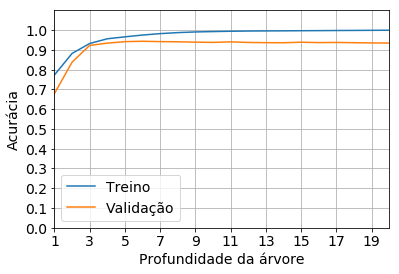

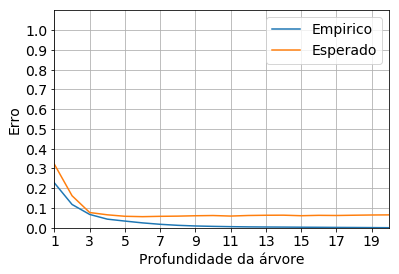

In [131]:
train_acc = []
train_error = []
val_acc = []
val_error = []
x_axis = [x for x in range(1, 21)]

#realiza os testes da árvore de decisão
#o hiperparâmetro testado, que representa a profundidade máxima da árvore, varia entre 1 e 20
for x in x_axis:
    x, y, z, w= test_decision_tree(x)
    train_acc.append(x)
    val_acc.append(y)
    train_error.append(z)
    val_error.append(w)
    
plt.plot(x_axis, train_acc, label = 'Treino')
plt.plot(x_axis, val_acc, label = 'Validação')
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.xticks([x for x in range(1, 25,2)])
plt.grid(True)
plt.ylabel('Acurácia')
plt.xlabel('Profundidade da árvore')
plt.axis([1, 20, 0, 1.1])
plt.legend()
plt.show()

plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.xticks([x for x in range(1, 25,2)])
plt.grid(True)
plt.ylabel('Erro')
plt.xlabel('Profundidade da árvore')
plt.plot(x_axis,train_error, label = 'Empirico')
plt.plot(x_axis,val_error,label='Esperado')
plt.axis([1, 20, 0, 1.1])
plt.grid(True)
plt.legend()
plt.show()

É possível notar que a partir da profundidade máxima de 19 a árvore consegue decorar completamente a base. Entretanto o modelo onde os valores de acurácia do treino e da valiação mais se aproximam é com o hiperparâmetro 3, tendo o hiperparâmetro 5 uma boa aproximação e uma acurácia um pouco melhor. A partir desse ponto, as curvas começam a se distanciar, a acurácia do treino se aproxima do 100% (overfitting) enquanto a acurácia da validação se mantem mais ou menos estável. Sendo assim, podemos considerar o modelo construido com o hiperparâmetro 5 o que obteve o melhor desempenho

### SVM

In [132]:
#Define a função que recebe o nome do Kernel,
#treina o modelo e exibe os resultados
def test_svm_linear(C, roc = False, results = False):
    clf = svm.SVC(kernel = C, probability = True, gamma = 'auto')
    train_acc, val_acc, y_prob, y_val, train_error, val_error, precision, recall = cross_validation(clf)
    
    if results:
        print("C = {}".format(C))
        print("Acurácia: {:.3}".format(val_acc))
        print("Precisão : {:.3}".format(precision))
        print("Revocação : {:.3}".format(recall))
    
    if roc:
        curva_roc(y_val, y_prob)
        
    return val_acc

C = linear
Acurácia: 0.941
Precisão : 0.737
Revocação : 0.947
C = sigmoid
Acurácia: 0.812
Precisão : 0.623
Revocação : 0.692
C = poly
Acurácia: 0.763
Precisão : 0.616
Revocação : 0.859
C = rbf
Acurácia: 0.927
Precisão : 0.7
Revocação : 0.843


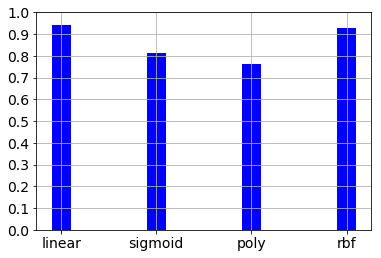

In [133]:
results = []

#realiza o teste com o SVM
#o hiperparâmetro representa o Kernel- função responsável por transformar o espaço de features- utilizado pelo modelo
results.append(test_svm_linear("linear", results = True))
results.append(test_svm_linear("sigmoid", results = True))
results.append(test_svm_linear("poly", results = True))
results.append(test_svm_linear("rbf", results = True))

y_axis = results
x_axis = ['linear', 'sigmoid', 'poly', 'rbf']
width_n = 0.2
bar_color = 'blue'
plt.bar(x_axis, y_axis, width=width_n, color=bar_color)
plt.ylim([0.0,1.0])
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.grid(True)
plt.show()

O kernel linear obteve o melhor desempenho nos dados atuais, seguido de perto pelo rbf. As métricas de alguns modelos melhoraram durante os testes de seleção de features, entretanto nenhum deles conceguiu bater as métricas do kernel linear utilizando todas a features. 

### K-NN

In [134]:
# Define a funcao que recebe o numero k de vizinhos,
# treina o modelo e mostra os resultados
def test_knn(k, roc = False, results = False):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    train_acc, val_acc, y_prob, y_val, train_error, val_error, precision, recall = cross_validation(clf)
    
    if results:
        print("K = {}".format(k))
        print("Acurácia: {:.3}".format(val_acc))
        print("Precisão : {:.3}".format(precision))
        print("Revocação : {:.3}".format(recall))
    
    if roc:
        curva_roc(y_val, y_prob)
        
    return train_acc, val_acc, train_error, val_error

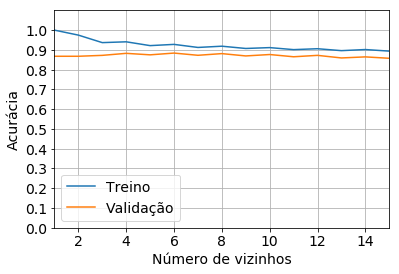

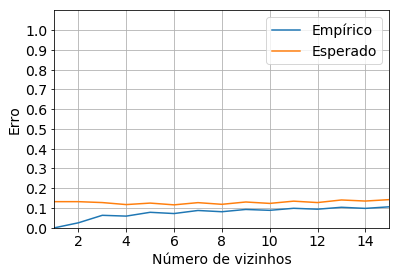

In [135]:
train_acc = []
train_error = []
val_acc = []
val_error = []
x_axis = [x for x in range(1, 16)]


#realiza os teste do KNN
#o hiperparâmetro testado, que representa o número de vizinhos levados em consideração, varia entre 1 e 15
for x in x_axis:
    x, y, z, w = test_knn(x)
    train_acc.append(x)
    val_acc.append(y)
    train_error.append(z)
    val_error.append(w)
    
plt.plot(x_axis, train_acc, label = 'Treino')
plt.plot(x_axis, val_acc, label = 'Validação')
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.axis([1, 15, 0, 1.1])
plt.legend()
plt.grid(True)
plt.ylabel('Acurácia')
plt.xlabel('Número de vizinhos')
plt.show()

plt.plot(x_axis,train_error, label = 'Empírico')
plt.plot(x_axis,val_error,label='Esperado')
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.axis([1, 15, 0, 1.1])
plt.legend()
plt.grid(True)
plt.ylabel('Erro')
plt.xlabel('Número de vizinhos')
plt.show()

A acurácia de 100% no treino para k igual a 1 ocorre pois o modelo só considera a própria instância na classificação. Conforme o número de vizinhos considerados aumenta, o erro empirico aumenta- pois a vizinhaça começa a afetar a classificação da instância-  enquanto o erro esperado diminnui pois, como o a instância que está sendo classificada não estava no treino, a classificação por meio da vizinhança evita o erro por variância.
É necessário lembrar que a vizinhaça também pode trazer ruido para a classificação, sendo assim, é necessário testar o parâmetro, não sendo uma boa ideia considerar todos os pontos da base como vizinhos. Diante disso, o hiperparâmetro 10 apresenta um dos melhores balanços entre tamanho de vizinhaça e a acurácia do modelo.

### Random Forest

In [136]:
# Define uma funcao que recebe o numero de árvores e a profundidade máxima,
# treina o modelo e mostra os resultados
def test_rf(N, roc = False, results = False):
    clf = ensemble.RandomForestClassifier(n_estimators=N)
    train_acc, val_acc, y_prob, y_val, train_error, val_error, precision, recall = cross_validation(clf)
    
    if results:
        print("Número de árvores = {}".format(N))
        print("Acurácia: {:.3}".format(val_acc))
        print("Precisão : {:.3}".format(precision))
        print("Revocação : {:.3}".format(recall))
    
    if roc:
        curva_roc(y_val,y_prob)
    
    return train_acc, val_acc, train_error, val_error

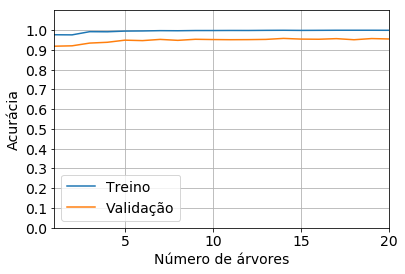

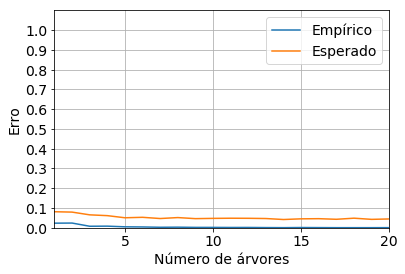

In [137]:
train_acc = []
train_error = []
val_acc = []
val_error = []
x_axis = [x for x in range(1, 21)]

#realiza os testes com o random forest
#o hiperparâmetro testado, que representa o número de árvores da floresta, varia entre 1 e 20
for x in x_axis:
    x, y, z, w = test_rf(x)
    train_acc.append(x)
    val_acc.append(y)
    train_error.append(z)
    val_error.append(w)
    
plt.plot(x_axis, train_acc, label = 'Treino')
plt.plot(x_axis, val_acc, label = 'Validação')
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.axis([1, 20, 0, 1.1])
plt.legend()
plt.grid(True)
plt.ylabel('Acurácia')
plt.xlabel('Número de árvores')
plt.show()

plt.plot(x_axis,train_error, label = 'Empírico')
plt.plot(x_axis,val_error,label='Esperado')
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.axis([1, 20, 0, 1.1])
plt.legend()
plt.grid(True)
plt.ylabel('Erro')
plt.xlabel('Número de árvores')
plt.show()

O modelo apresenta alguma melhora no erro esperado conforme o número de árvores aumenta, entretanto a métrica de acurácia se estabiliza a partir da random forest com 5 árvores. Ocorreram tentativas de seleção de features, mas elas não propriciaram uma melhora significativa na acurácia do modelo.

### Gradient Tree Boosting

In [138]:
# Define uma funcao que recebe o numero de classificadores do modelo,
# treina o modelo e mostra os resultados
def test_adaboost(N, roc = False, results = False):
    clf = ensemble.AdaBoostClassifier(n_estimators=N)
    train_acc, val_acc, y_prob, y_val, train_error, val_error, precision, recall = cross_validation(clf)
        
    if results:
        print("N = {}".format(N))
        print("Acurácia: {:.3}".format(val_acc))
        print("Precisão : {:.3}".format(precision))
        print("Revocação : {:.3}".format(recall))
        
    if roc:
        curva_roc(y_val,y_prob)   
    
    return train_acc, val_acc, train_error, val_error

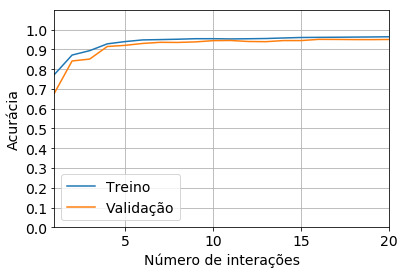

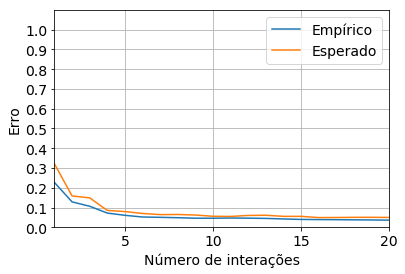

In [139]:
train_acc = []
train_error = []
val_acc = []
val_error = []
x_axis = [x for x in range(1, 21)]

#realiza os testes com o adaboost
#o hiperparâmetro testado, que representa o número de interações do modelo, varia entre 1 e 20
for x in x_axis:
    x, y, z, w = test_adaboost(x)
    train_acc.append(x)
    val_acc.append(y)
    train_error.append(z)
    val_error.append(w)
    

plt.plot(x_axis, train_acc, label = 'Treino')
plt.plot(x_axis, val_acc, label = 'Validação')
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.axis([1, 20, 0, 1.1])
plt.legend()
plt.grid(True)
plt.ylabel('Acurácia')
plt.xlabel('Número de interações')
plt.show()


plt.plot(x_axis,train_error, label = 'Empírico')
plt.plot(x_axis,val_error,label='Esperado')
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.axis([1, 20, 0, 1.1])
plt.legend()
plt.grid(True)
plt.ylabel('Erro')
plt.xlabel('Número de interações')
plt.show()

O algoritmo adaboost apresenta a melhora de acurácia esperada conforme o número de interações aumenta, isso acontece pois cada nova interação dá maior importância para as instâncias que foram classificadas de forma errada anteriormente. Nos teste executados, o modelo saiu de uma acurácia de 0.67, realizando uma interação, para 0.95, realizando 16 interações. A partir desse ponto, a métrica começa a se estabilizar, tendo o modelo com 50 interações apresentado também 0.95 de acurácia.

## Resultados

Nessa sessão serão apresentados os resultados treinados utilizando os melhores hiperparâmetros 

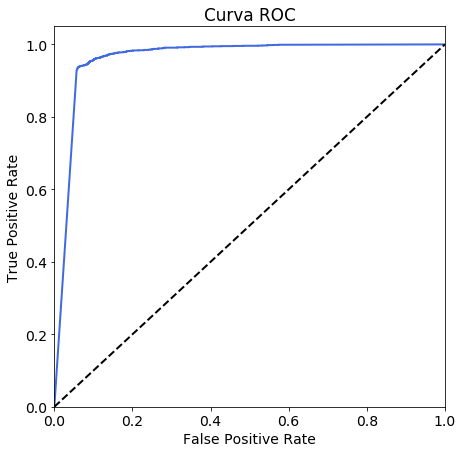

Acuracia de treino: 0.917
Acuracia de validação: 0.916
Precisão : 0.675
Revocação : 0.863


In [140]:
test_naive_bayes(roc = True)

Profundidade máxima = 5
Acurácia: 0.941
Precisão : 0.73
Revocação : 0.948


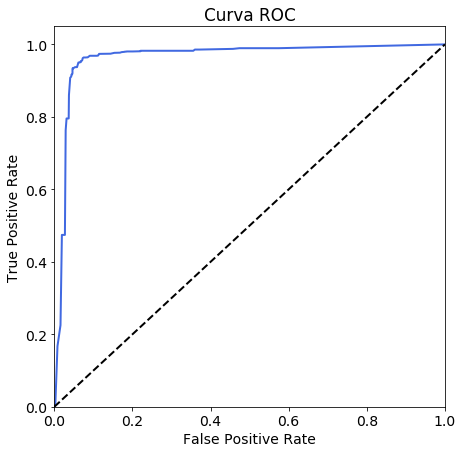

In [141]:
_,_,_,_  = test_decision_tree(5, results = True, roc = True)

C = linear
Acurácia: 0.941
Precisão : 0.737
Revocação : 0.947


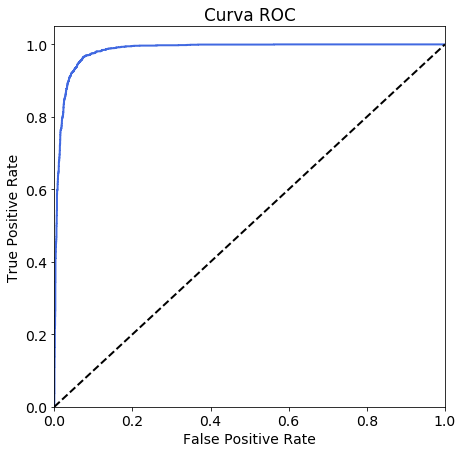

In [142]:
_ = test_svm_linear("linear", results = True, roc = True)

K = 10
Acurácia: 0.877
Precisão : 0.628
Revocação : 0.95


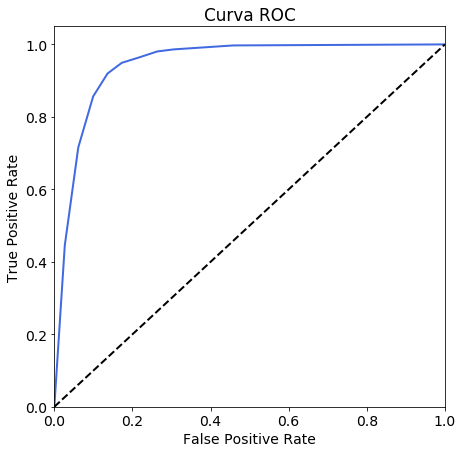

In [143]:
_,_,_,_  = test_knn(10, results = True, roc = True)

Número de árvores = 5
Acurácia: 0.948
Precisão : 0.753
Revocação : 0.828


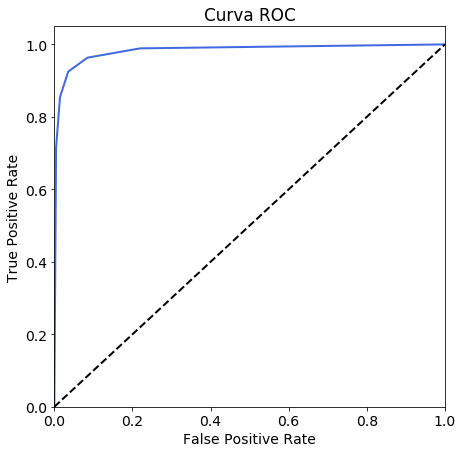

In [144]:
_,_,_,_ = test_rf(5, results = True, roc = True)

N = 16
Acurácia: 0.951
Precisão : 0.747
Revocação : 0.848


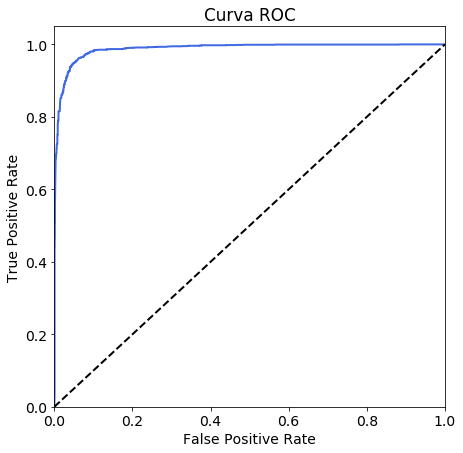

In [145]:
_,_,_,_ = test_adaboost(16, results = True, roc = True)

Todos os modelos apresentaram um bom desempenho- o que pode ser um indício de que os dados têm uma distribuição bem definida- sendo que todos obtiveram uma acurácia acima de 0.8. Os modelos com o melhor desempenho foram o adaboost e o random forest, ambos obtiveram métricas semelhantes e, de acordo com a curva ROC, conseguem taxas de verdadeiros positivos de 70% antes de a começarem a apresentar falsos positivos.

Apesar do bom desempenho dos modelos, o KNN - modelo baseado em vizinhaça - obteve as piores métricas, isso pode indicar que, apesar de aparentemente ter uma separação bem definida entre as classes, ambas as classes tem características muito próximas e, por consequência, suas instâncias estão próximas umas das outras. Durante os testes, foi executada a redução da dimensão de features - sendo 5 o menor número de features utilizadas - entretanto o KNN não apresentou melhoras significativas. 